# Libraries

In [1]:
import numpy as np
import math
import utils
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest

# Feature Importance

In [2]:
def ordinal_best(df):
    features,labels=utils.feature_label_split(df)
    features=utils.preproc_features_df(features,ordinal=True)
    labels=utils.preproc_labels_df(labels)
    skb=SelectKBest(k="all").set_output(transform="pandas")
    kdf=skb.fit_transform(features,labels)
    print("Ordinal:")
    ns=[]
    ss=[]
    for s,n in zip(skb.scores_,skb.feature_names_in_):
        ns.append(n)
        ss.append(s)
    # Create a bar chart showing the percentage of delayed flights for each of the top 10 cities
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.bar(ns, ss, color='blue')

    # Set the x-axis label and rotate the tick labels
    ax.set_xlabel('Feature')
    ax.set_xticklabels(ns, rotation=45, ha='right')

    # Set the y-axis label and format the ticks as percentages
    ax.set_ylabel('Feature Importance')
    ax.yaxis.set_major_formatter('{x:.0f}')

    # Set the title of the plot
    ax.set_title('Select K Best with ANOVA')

    plt.show()

Ordinal:


C:\Users\brand\AppData\Local\Temp\ipykernel_26244\1241384716.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ns, rotation=45, ha='right')


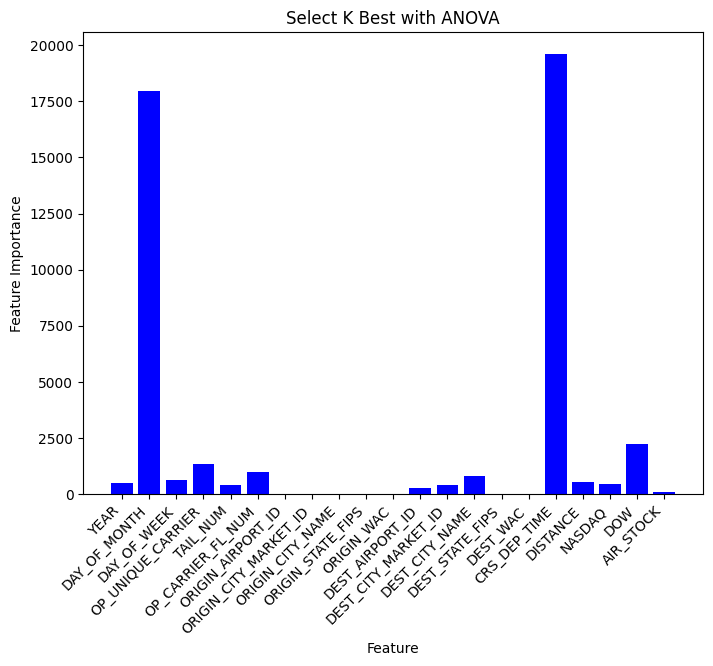

In [3]:
def main():
    df=utils.load_data(separate=False)
    ordinal_best(df)

if __name__ == "__main__":
    main()